In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
# Reading .parquet File
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\veh crash\Motor_Vehicle_Collisions_Crashes.parquet')

#Formatting to date format and extracting year & month
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['crash_year']=df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.strftime('%b')
df['date'] = df['CRASH DATE'].dt.day
df['day']=df['CRASH DATE'].dt.strftime('%a')

- Which Street has high number of car crashes ?

In [14]:
plot13=df.groupby('ON STREET NAME').size().sort_values(ascending=False).head(10).reset_index(name='count')
plot13

,ON STREET NAME,count
0,BROADWAY,17277
1,ATLANTIC AVENUE,15322
2,BELT PARKWAY,13543
3,3 AVENUE,12476
4,NORTHERN BOULEVARD,11965
5,LONG ISLAND EXPRESSWAY,9928
6,BROOKLYN QUEENS EXPRESSWAY,9743
7,FLATBUSH AVENUE,9741
8,LINDEN BOULEVARD,9587
9,QUEENS BOULEVARD,9368


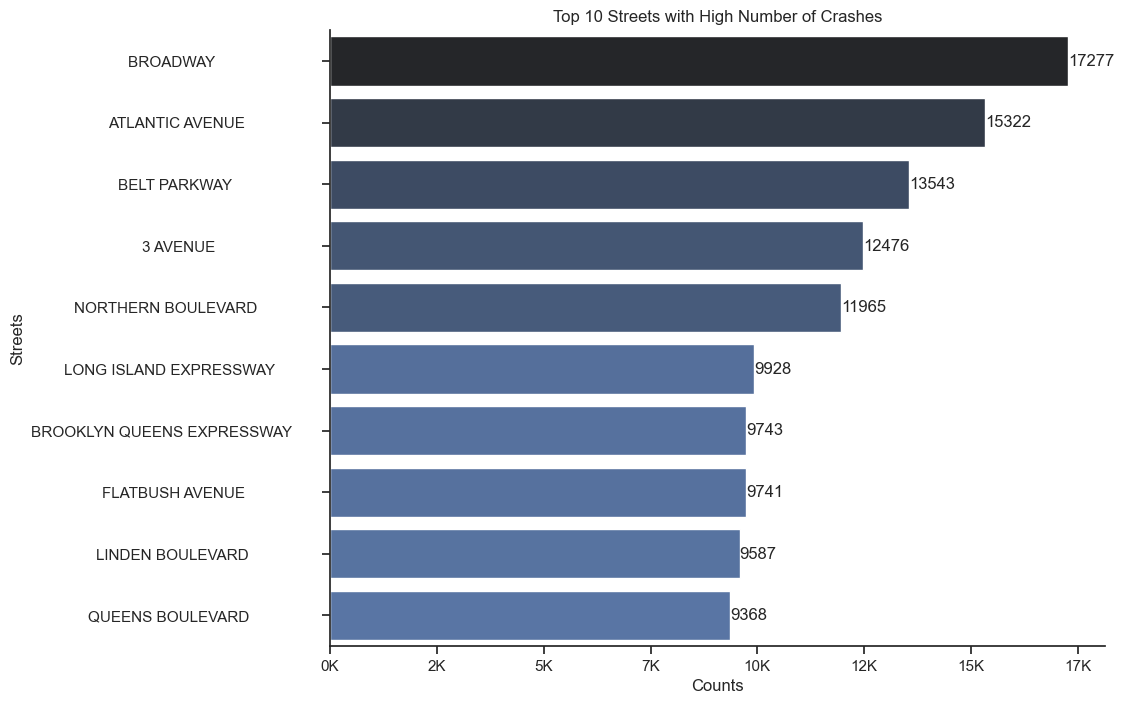

In [22]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot13,x='count',hue='count',y='ON STREET NAME',palette='dark:b_r')
plt.xlabel('Counts')
plt.ylabel('Streets')
plt.title('Top 10 Streets with High Number of Crashes')
ax.legend_.remove()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

- Identify hotspots by ZIP code or borough

In [23]:
pd.set_option('display.max_columns',None)
df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_year,month,date,day
0,2021-09-11,2:39,None,None,NaN,NaN,None,WHITESTONE EXPRESSWAY,20 AVENUE,None,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None,2021,Sep,11,Sat
1,2022-03-26,11:45,None,None,NaN,NaN,None,QUEENSBORO BRIDGE UPPER,None,None,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,None,None,None,None,4513547,Sedan,None,None,None,None,2022,Mar,26,Sat


In [42]:
plot14=df.groupby('ZIP CODE').size().sort_values(ascending=False).head(15).reset_index(name='count')
plot14['ZIP CODE'] = plot14['ZIP CODE'].astype(float).astype(int)
plot14=plot14.sort_values(by='count',ascending=True)
plot14

,ZIP CODE,count
14,10036,11960
13,11368,11991
12,11233,12551
11,10019,12618
10,11201,13355
9,11434,13363
8,11226,14091
7,11101,14732
6,11385,14856
5,11208,14975


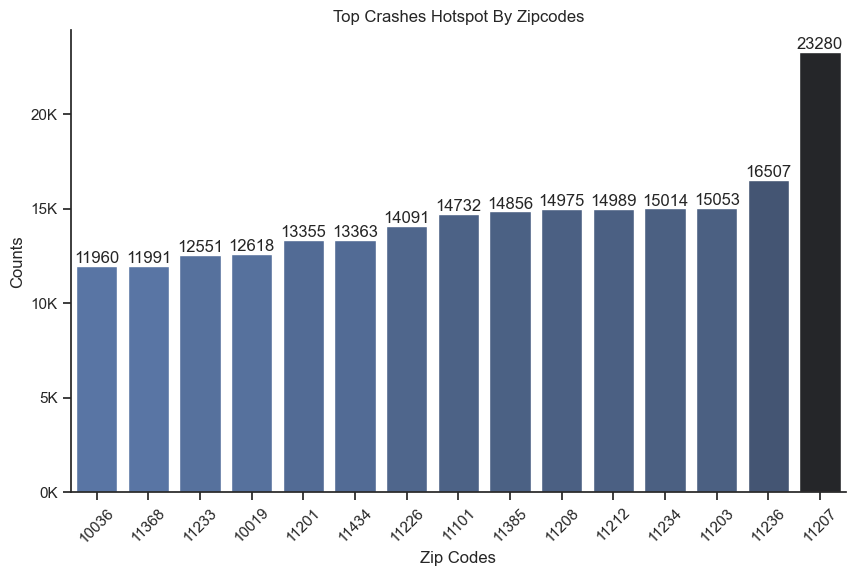

In [52]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot14,x='ZIP CODE',y='count',hue='count',palette='dark:b_r',order=plot14['ZIP CODE'])
plt.xlabel('Zip Codes')
plt.ylabel('Counts')
plt.title('Top Crashes Hotspot By Zipcodes')
ax.legend_.remove()
plt.setp(ax.get_xticklabels(), rotation=45, ha='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()